# **Bài 1: Hãy đọc dữ liệu, và cho biết các thông tin sau:**

In [33]:
import glob
import cv2
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# **a) Mục tiêu / tác vụ mà bộ dữ liệu hướng tới là gì?**

In [34]:
IMG_SIZE = 227
classes = ['NORMAL', 'PNEUMONIA']

def load_dataset(path):
    X = []
    y = []
    
    for c in classes:
        class_path = os.path.join(path, c)
        files = glob.glob(class_path + "/*.jpeg")
        for file in files:
            img = cv2.imread(file)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img.flatten()
            X.append(img)
            y.append(c)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return X, y_encoded

# **b) Kích thước của dữ liệu là bao nhiêu trên các tập train, val và test?**

In [35]:
X_train, y_train = load_dataset('/kaggle/input/chest-xray-pneumonia/chest_xray/train')

In [36]:
print("Kích thước dữ liệu trên tập train:")
print(X_train.shape)

Kích thước dữ liệu trên tập train:
(5216, 154587)


In [37]:
X_val, y_val = load_dataset('/kaggle/input/chest-xray-pneumonia/chest_xray/val')

In [38]:
print("Kích thước dữ liệu trên tập val:")
print(X_val.shape)

Kích thước dữ liệu trên tập val:
(16, 154587)


In [39]:
X_test, y_test = load_dataset('/kaggle/input/chest-xray-pneumonia/chest_xray/test')

In [40]:
print("Kích thước dữ liệu trên tập test:")
print(X_test.shape)

Kích thước dữ liệu trên tập test:
(624, 154587)


# **c) Phân bố nhãn theo từng tác vụ trên các tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên từng tập dữ liệu.**

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
def display_barplot(y, scripts):
    # Tạo DataFrame chỉ với nhãn
    df_data = pd.DataFrame({'Labels': y})
    
    # Đếm số lượng mỗi nhãn
    label_counts = df_data['Labels'].value_counts().reset_index()
    label_counts.columns = ['Classes', 'Counts']
    
    # Vẽ bar plot
    sns.barplot(x='Classes', y='Counts', data=label_counts)
    plt.title(f'Distribution of Classes In {scripts} Dataset')
    plt.show()

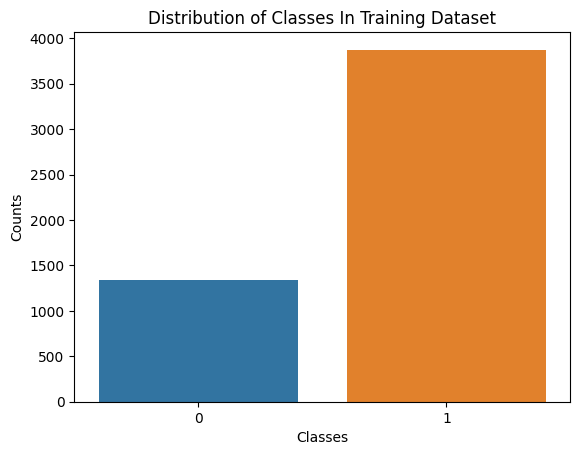

In [43]:
display_barplot(y_train, 'Training')

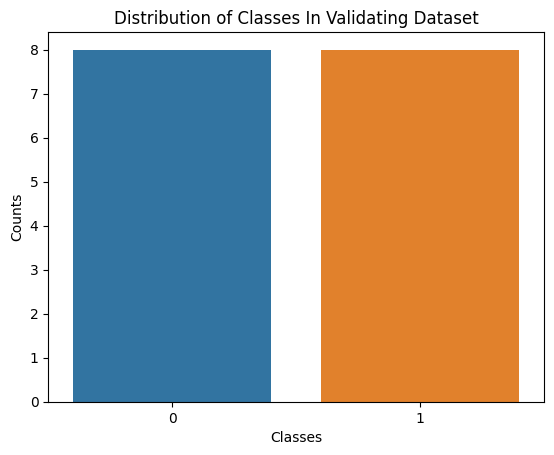

In [44]:
display_barplot(y_val, "Validating")

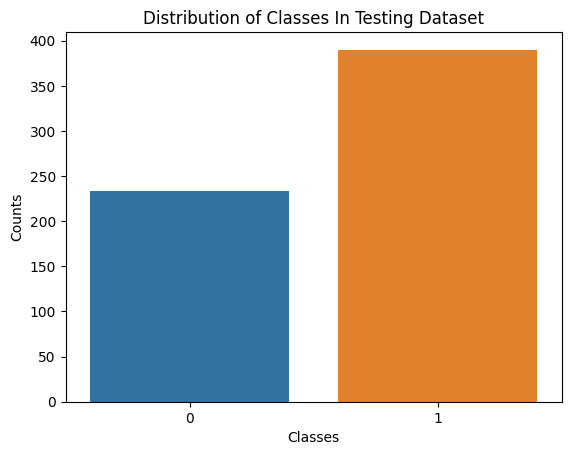

In [45]:
display_barplot(y_test, "Testing")

# **d) Hãy hiển thị khoảng 3 bức hình về ảnh X-Quang phổi lên màn hình.**

In [46]:
def display_img(img, scripts, label):
    plt.imshow(img)
    print(f"{scripts}\n")
    plt.title(label)
    plt.show()

Image in Training Dataset



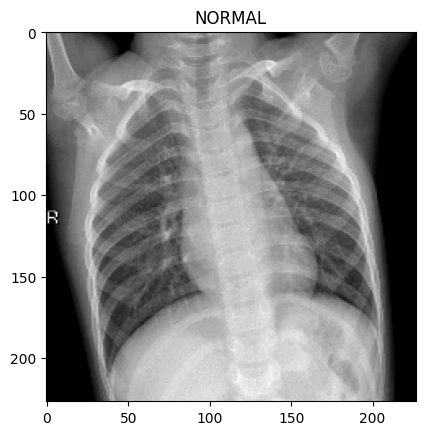

In [47]:
inx_train = 123
display_img(X_train[inx_train].reshape((IMG_SIZE, IMG_SIZE, 3)), "Image in Training Dataset", classes[y_train[inx_train]])

Image in Validating Dataset



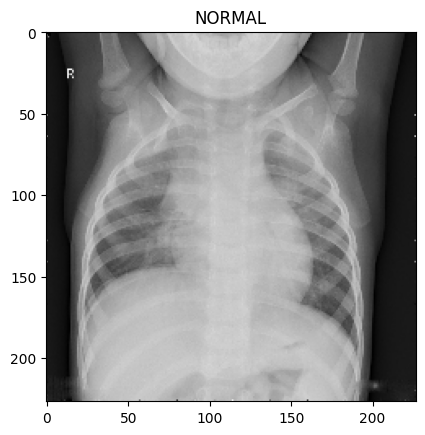

In [48]:
inx_val = 7
display_img(X_val[inx_val].reshape((IMG_SIZE, IMG_SIZE, 3)), "Image in Validating Dataset", classes[y_val[inx_val]])

Image in Testing Dataset



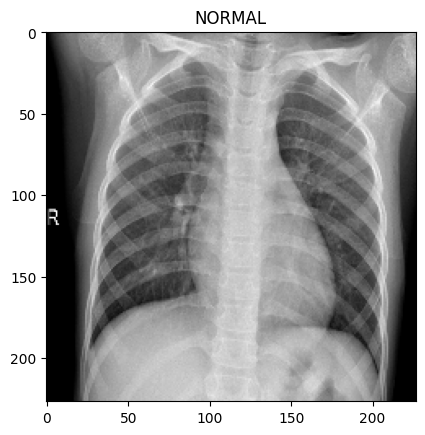

In [49]:
inx_test = 123
display_img(X_test[inx_test].reshape((IMG_SIZE, IMG_SIZE, 3)), "Image in Testing Dataset", classes[y_test[inx_test]])

# **Bài 2: Huấn luyện mô hình bằng phương pháp Logistic Regression.**

In [50]:
from sklearn.utils import resample
def balance_dataset(X, y):
    # Tạo mảng chứa chỉ mục của mỗi lớp
    indices_per_class = [np.where(y == i)[0] for i in np.unique(y)]
    
    # Tìm chỉ mục của lớp có số lượng mẫu ít nhất
    min_samples = min([len(indices) for indices in indices_per_class])
    
    # Downsample từng lớp về số lượng mẫu ít nhất
    X_balanced = []
    y_balanced = []
    for indices in indices_per_class:
        downsampled_indices = resample(indices, replace=False, n_samples=min_samples, random_state=42)
        X_balanced.extend(X[downsampled_indices])
        y_balanced.extend(y[downsampled_indices])
    
    # Chuyển đổi thành mảng numpy
    X_balanced = np.array(X_balanced)
    y_balanced = np.array(y_balanced)
    
    return X_balanced, y_balanced

In [51]:
X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)

In [52]:
X_train_balanced.shape

(2682, 154587)

In [57]:
def scaler_data(X1, X2, X3):
    scaler = StandardScaler()
    X1 = scaler.fit_transform(X1)
    X2 = scaler.fit_transform(X2)
    X3 = scaler.fit_transform(X3)
    return X1, X2, X3

In [58]:
X_train_balanced, X_val_, X_test_ = scaler_data(X_train_balanced, X_val, X_test)


In [78]:
model_lr = LogisticRegression(penalty="elasticnet", solver='saga', l1_ratio=0.25, C=0.5, tol = 0.008)
model_lr.fit(X_train_balanced, y_train_balanced)

LogisticRegression(C=0.5, l1_ratio=0.25, penalty='elasticnet', solver='saga',
                   tol=0.008)

In [79]:
y_test_predict_lr = model_lr.predict(X_test_)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression model accuracy:",
      accuracy_score(y_test, y_test_predict_lr))

print("Confusion Matrix:\n",
     confusion_matrix(y_test, y_test_predict_lr))

print("Logistic Regression model report:\n", 
      classification_report(y_test, y_test_predict_lr, target_names=classes))

Logistic Regression model accuracy: 0.8141025641025641
Confusion Matrix:
 [[199  35]
 [ 81 309]]
Logistic Regression model report:
               precision    recall  f1-score   support

      NORMAL       0.71      0.85      0.77       234
   PNEUMONIA       0.90      0.79      0.84       390

    accuracy                           0.81       624
   macro avg       0.80      0.82      0.81       624
weighted avg       0.83      0.81      0.82       624



In [80]:
joblib.dump(model_lr, 'Logistic_Regression_model.pkl')

['Logistic_Regression_model.pkl']

# **Bài 3: Huấn luyện mô hình bằng phương pháp SVM.**

In [65]:
model_svc = SVC()
model_svc.fit(X_train_balanced, y_train_balanced)

SVC()

In [66]:
y_test_predict_svc = model_svc.predict(X_test_)

from sklearn.metrics import accuracy_score, classification_report

print("SVC model accuracy:",
      accuracy_score(y_test, y_test_predict_svc))

print("Confusion Matrix:\n",
     confusion_matrix(y_test, y_test_predict_svc))

print("SVC model report:\n", 
      classification_report(y_test, y_test_predict_svc, target_names=classes))

SVC model accuracy: 0.844551282051282
Confusion Matrix:
 [[193  41]
 [ 56 334]]
SVC model report:
               precision    recall  f1-score   support

      NORMAL       0.78      0.82      0.80       234
   PNEUMONIA       0.89      0.86      0.87       390

    accuracy                           0.84       624
   macro avg       0.83      0.84      0.84       624
weighted avg       0.85      0.84      0.85       624



In [67]:
joblib.dump(model_svc, 'SVC_model.pkl')

['SVC_model.pkl']

# **Bài 4: Hãy so sánh kết quả thực hiện giữa 2 phương pháp phân lớp trên. Phương pháp nào cho kết quả tốt hơn?**

# Từ kết quả thực nghiệm bằng 2 phương pháp Logistic Regression và SVM. Thì phương pháp SVM cho kết quả tốt hơn. Với đánh giá trên chỉ số accuracy cao hơn xấp xỉ 3.3%

In [ ]:
!zip -r val.zip /kaggle/input/chest-xray-pneumonia/chest_xray/val

# **Link github bài tập nâng cao Lab5**
https://github.com/phamthanhlam0201/Lab5-DS102-Classify_Image_Chest_Xray